In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")


In [2]:
mall = pd.read_csv('D:\Mall_Customers.csv')
                 
                   
                   
        

In [3]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
mall = mall.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score'})


In [6]:
mall['Gender'].replace(['Female','Male'], [0,1],inplace=True)


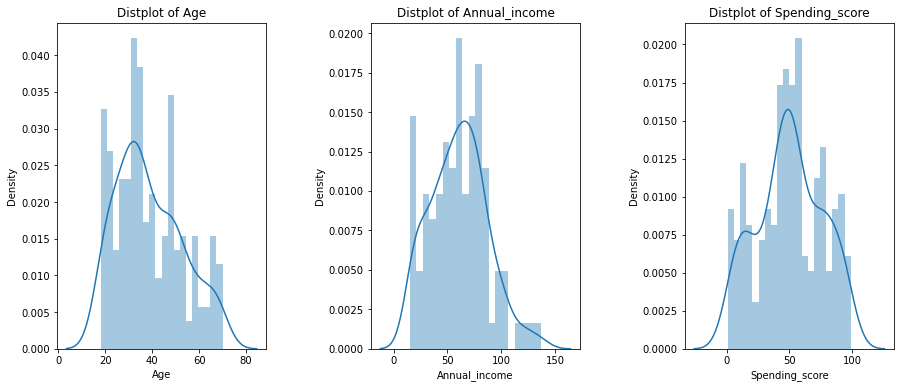

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual_income' ,'Spending_score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(mall[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

0    112
1     88
Name: Gender, dtype: int64

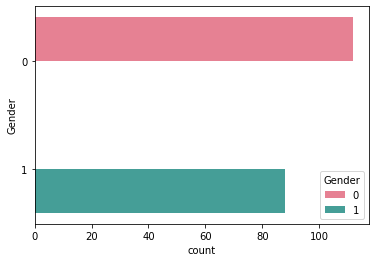

In [8]:
#Count and plot gender
sns.countplot(y = 'Gender', data = mall, palette="husl", hue = "Gender")
mall["Gender"].value_counts()

KeyError: 'Spending_score '

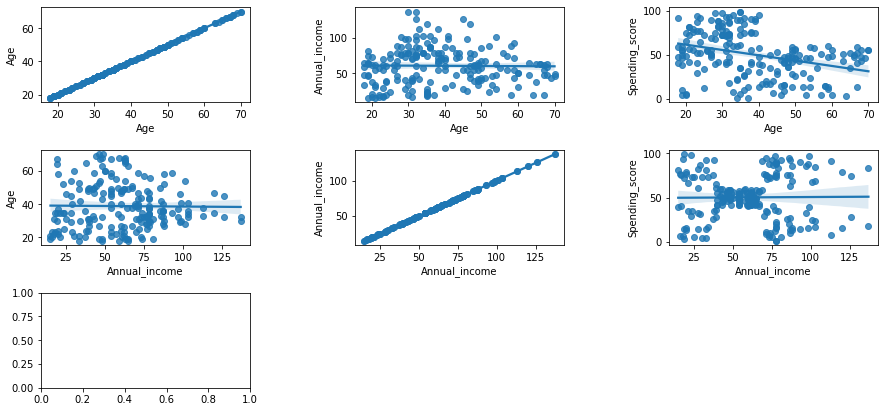

In [9]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual_income' , 'Spending_score ']:
    for y in ['Age' , 'Annual_income' ,'Spending_score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = mall)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [ ]:
#Pairplot with variables we want to study
sns.pairplot(mall, vars=["Age", "Annual_income", "Spending_score"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])


In [ ]:
sns.lmplot(x = "Annual_income", y = "Spending_score", data = mall, hue = "Gender")


In [ ]:
sns.lmplot(x = "Age", y = "Spending_score", data = mall, hue = "Gender")


In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual_income , mall = mall[mall["Gender"] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in  ['Age' , 'Annual_income' , 'Spending_score ']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = mall , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = mall)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

In [ ]:
'''Age and spending Score'''
X1 = mall[['Age' ,  "Spending_score"]].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [ ]:
means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(X)
labels = means_k.labels_
centroids = means_k.cluster_centers_


In [ ]:
trace1 = go.Scatter3d(
    x= X['Spending_score'],
    y= X['Annual_income'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)
